# 1.0 - IMPORTAÇÃO DE PACOTES

In [1]:
# Manipulação de Dados
import numpy as np
import pandas as pd

# Visualização de Dados
import matplotlib.pyplot as plt
import matplotlib as mpl

## 1.0.1 - VERSÕES DOS PACOTES INSTALADOS

In [2]:
%reload_ext watermark
%watermark -a 'Versões dos pacotes instalados neste projeto' --iversions

pandas     1.1.2
matplotlib 3.3.2
numpy      1.19.2
Versões dos pacotes instalados neste projeto


# 2.0 - CARREGAMENTO DO DATASET

In [3]:
dados_treino = pd.read_csv('dataset4.txt')

In [4]:
dados_teste = pd.read_csv('dataset5.txt')

In [5]:
dados_teste.head()

,ID,Datetime
0,18288,26-09-2019 00:00
1,18289,26-09-2019 01:00
2,18290,26-09-2019 02:00
3,18291,26-09-2019 03:00
4,18292,26-09-2019 04:00


In [6]:
dados_treino.head()

,ID,Datetime,Count
0,0,25-08-2017 00:00,8
1,1,25-08-2017 01:00,2
2,2,25-08-2017 02:00,6
3,3,25-08-2017 03:00,2
4,4,25-08-2017 04:00,2


# 3.0 - ANÁLISE EXPLORATÓRIA

In [8]:
df3_treino = dados_treino.copy()
df3_teste = dados_teste.copy()

#### Verificando o tipo dos dados nos Datasets de Treino e Teste

In [11]:
df3_treino.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [12]:
df3_teste.dtypes

ID           int64
Datetime    object
dtype: object

#### Convertendo a coluna DateTime de ambos os Datasets para o tipo correto

In [13]:
df3_treino.Datetime = pd.to_datetime(df3_treino.Datetime, format='%d-%m-%Y %H:%M')
df3_teste.Datetime = pd.to_datetime(df3_teste.Datetime, format='%d-%m-%Y %H:%M')

In [18]:
df3_treino.dtypes

ID                   int64
Datetime    datetime64[ns]
Count                int64
dtype: object

In [19]:
df3_teste.dtypes

ID                   int64
Datetime    datetime64[ns]
dtype: object

#### Derivando o máximo de detalhes da coluna 'Datetime' dos Datasets

In [20]:
for i in (df3_teste, df3_treino):
    i['ano'] = i.Datetime.dt.year
    i['mes'] = i.Datetime.dt.month
    i['dia'] = i.Datetime.dt.day
    i['hora'] = i.Datetime.dt.hour
    i['dia_semana'] = i.Datetime.dt.dayofweek

In [21]:
df3_treino.head(3)

,ID,Datetime,Count,ano,mes,dia,hora,dia_semana
0,0,2017-08-25 00:00:00,8,2017,8,25,0,4
1,1,2017-08-25 01:00:00,2,2017,8,25,1,4
2,2,2017-08-25 02:00:00,6,2017,8,25,2,4


In [22]:
df3_teste.head(3)

,ID,Datetime,ano,mes,dia,hora,dia_semana
0,18288,2019-09-26 00:00:00,2019,9,26,0,3
1,18289,2019-09-26 01:00:00,2019,9,26,1,3
2,18290,2019-09-26 02:00:00,2019,9,26,2,3


## 3.0.1 -  Trabalhando com o Dataset de Treino

##### Criando uma coluna categórica para Finais de Semana e Dias da Semana, onde 1 = Fim de Semana e 0 = Dia da Semana Comum

In [23]:
def fimDeSemana(registro):
    if registro.dayofweek == 5 or registro.dayofweek == 6:
        return 1
    else:
        return 0 

In [25]:
df3_treino['final_semana'] = df3_treino.Datetime.apply(fimDeSemana)

In [28]:
df3_treino.sample(5)

,ID,Datetime,Count,ano,mes,dia,hora,dia_semana,final_semana
14892,14892,2019-05-07 12:00:00,338,2019,5,7,12,1,0
3781,3781,2018-01-29 13:00:00,16,2018,1,29,13,0,0
5688,5688,2018-04-19 00:00:00,40,2018,4,19,0,3,0
1781,1781,2017-11-07 05:00:00,12,2017,11,7,5,1,0
1372,1372,2017-10-21 04:00:00,6,2017,10,21,4,5,1


##### Definindo com índice do Dataset a coluna 'Datetime'

In [29]:
df3_treino.index = df3_treino['Datetime']

##### Plotando um gráfico de demanda de transporte na região

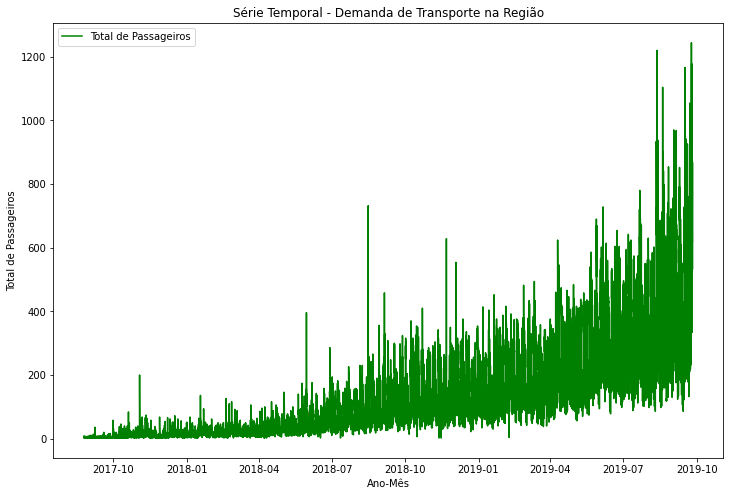

In [33]:
plt.figure(figsize=(12,8))
plt.title('Série Temporal - Demanda de Transporte na Região')
plt.plot(df3_treino.Count, label = 'Total de Passageiros', color = 'green')
plt.xlabel('Ano-Mês')
plt.ylabel('Total de Passageiros')
plt.legend(loc='best')
plt.show();

No gráfico acima percebe-se que há uma tendência de aumento de demanda de transporte na região.

##### Plotando um gráfico de barras da média de demanda de transporte na região por ano

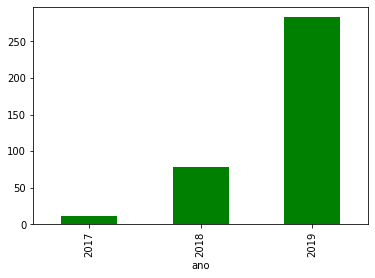

In [37]:
df3_treino.groupby('ano')['Count'].mean().plot.bar(color='green');

Mais uma vez confirmando a crescente demanda

##### Plotando um gráfico de barras com a média de demanda de transporte por mês

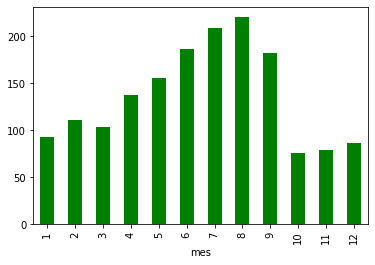

In [36]:
df3_treino.groupby('mes')['Count'].mean().plot.bar(color='green');

Pode-se observar um pico no mês de Agosto

##### Plotando um gráfico com a média de demanda de transporte mensal por ano

In [46]:
mma = df3_treino.groupby(['ano','mes'])['Count'].mean()

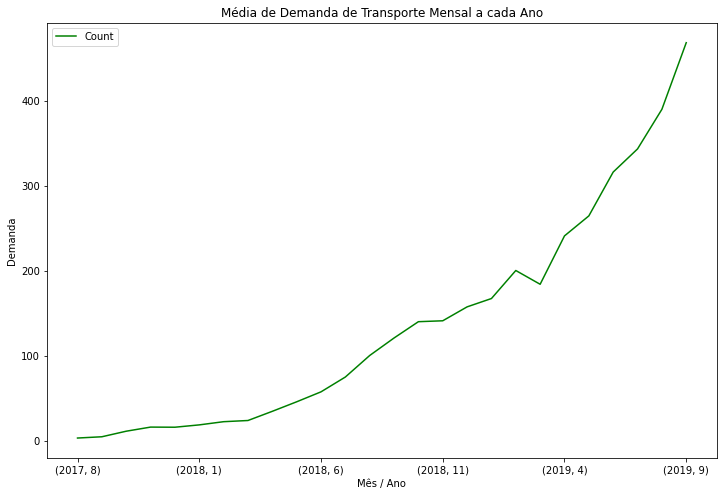

In [48]:
plt.figure(figsize=(12,8))
mma.plot(color='green')
plt.title('Média de Demanda de Transporte Mensal a cada Ano')
plt.ylabel('Demanda')
plt.xlabel('Mês / Ano')
plt.legend(loc='best')
plt.show();

##### Plotando um gráfico com a média de demanda de transporte diária do mês

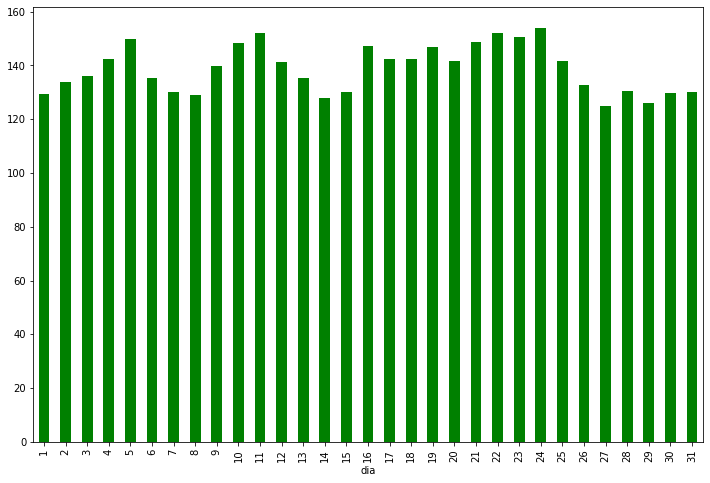

In [54]:
plt.figure(figsize=(12,8))
df3_treino.groupby('dia')['Count'].mean().plot.bar(color='green');

##### Plotando um gráfico com a média de demanda de transporte a cada hora do dia

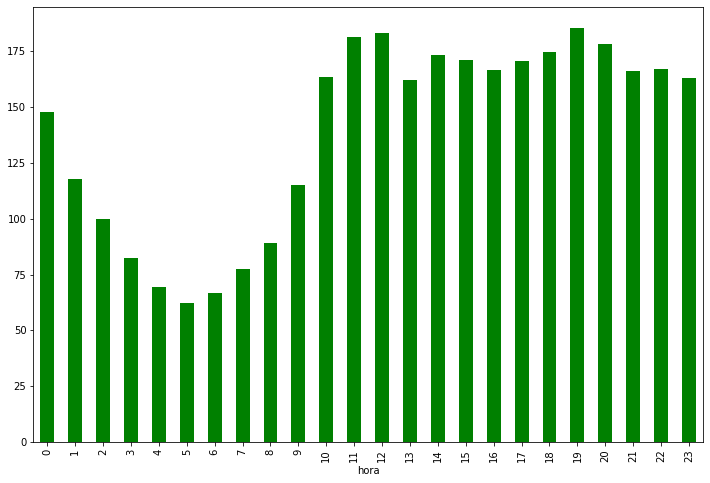

In [56]:
plt.figure(figsize=(12,8))
df3_treino.groupby('hora')['Count'].mean().plot.bar(color='green');

Observa-se que durante a madrugada a demanda cai.